# Enhanced protein isoform characterization through long-read proteogenomics 
## Supplementary Note 2
---
Ben Jordan | Gloria Sheynkman

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import os
import seaborn as sns


import matplotlib
import os, sys

import config

matplotlib.rc('font', **config.font)

# all plots go into a directory
if not os.path.exists('plot'):
    os.makedirs('plot')

# all statistics go into a directory
if not os.path.exists('stats'):
    os.makedirs('stats')

cpat_orf_file = f'{config.PIPELINE_RESULTS_DIRECTORY}/cpat/jurkat.ORF_prob.tsv'

cpat_all_orfs = pd.read_table(cpat_orf_file)
cpat_all_orfs['pb_acc'] = cpat_all_orfs['ID'].str.split('_').str[0]

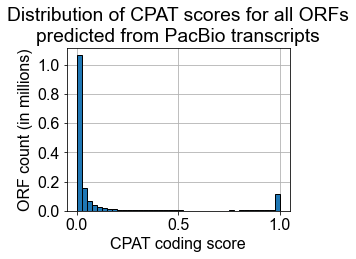

<Figure size 432x288 with 0 Axes>

In [2]:


def plot_cpat_coding_score_distribution(cpat_all_orfs):
    # all cpat orf coding score distribution
    cpat_all_orfs['Coding_prob'].hist(bins=40, figsize=(4,3), edgecolor='black', grid=False, zorder=10)
    plt.grid(zorder=0)
    plt.xlabel('CPAT coding score')
    plt.ylabel('ORF count (in millions)')
    plt.title('Distribution of CPAT scores for all ORFs\npredicted from PacBio transcripts')
    ticks = [0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6,]
    labels = [f'{x/1e6:1.1f}' for x in ticks]
    plt.yticks(ticks=[0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6,], labels=labels)
    plt.savefig(f'plot/FigS2.1_distr_of_cpat_orf_scores.pdf', bbox_inches='tight')
    plt.show()
    plt.clf()
    # output source data for histogram
    cpat_all_orfs['Coding_prob'].to_csv('stats/FigS2.1_src_data_distr_of_cpat_orf_scores.tsv', sep='\t', index=False)
plot_cpat_coding_score_distribution(cpat_all_orfs)


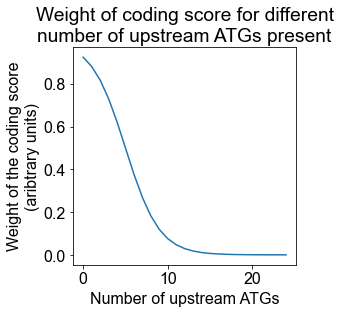

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
# plot of the ATG weighing scheme
atg_shift = 5       # how much to shift sigmoid for atg score
atg_growth = 0.5    # how quickly the slope of the sigmoid changes
atg_df = pd.DataFrame(columns = ['upstream_atgs'], data = list(range(25)))
atg_df['atg_score'] = atg_df['upstream_atgs'].apply(lambda x : 1 - 1/( 1+ np.exp(-atg_growth*(x - atg_shift))))
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(atg_df['upstream_atgs'], atg_df['atg_score'])
plt.xlabel('Number of upstream ATGs')
plt.ylabel('Weight of the coding score\n(aribtrary units)')
plt.title("Weight of coding score for different\nnumber of upstream ATGs present")
plt.savefig(f'plot/FigS2.2_atg_scores.pdf', bbox_inches='tight')
plt.show()
plt.clf()
# output source data
atg_df.to_csv('stats/FigS2.2_atg_scores.tsv', sep='\t', index=None)